In [491]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
from scipy.interpolate import spline

In [492]:
question6 = pd.read_csv('question6.csv')

In [493]:
question6

,region,month,highTemp,lowTemp,avgTemp,avgPrecipitation
0,9q,200601,23.8,-11.6,11.369254,-1993.562600
1,9r,200601,20.6,-16.4,4.199781,-3047.454600
2,9v,200601,26.9,-4.7,11.619350,-1919.703100
3,9q,200602,30.4,-16.6,14.546079,-1988.706500
4,9r,200602,24.2,-23.0,5.915715,-2548.370800
...,...,...,...,...,...,...
479,9r,201904,31.8,-7.8,9.047735,0.008255
480,9v,201904,34.9,-1.0,18.688208,0.022222
481,9q,201905,39.1,-3.6,14.619435,-1.938180
482,9r,201905,31.2,-9.1,11.846221,0.009012


In [494]:
'''question6['mn'] = question6['month'].astype(str).str[4:].astype(int)
question6['month'] = question6['month'].astype(str).str[:-2].astype(int)
question6_avg = question6.groupby(['month','mn'], as_index=False).mean()
question6_avg'''

"question6['mn'] = question6['month'].astype(str).str[4:].astype(int)\nquestion6['month'] = question6['month'].astype(str).str[:-2].astype(int)\nquestion6_avg = question6.groupby(['month','mn'], as_index=False).mean()\nquestion6_avg"

In [495]:
question6['mn'] = question6['month'].astype(str).str[4:].astype(int)
question6['month'] = question6['month'].astype(str).str[:-2].astype(int)
question6_average = question6.groupby(['month','mn']).mean()
question6_average

question6_average.reset_index()

df = []
for region, sub_df in question6_average.groupby('month',as_index=False):
    df.append(sub_df)



In [496]:
question6_average

highTemp    lowTemp    avgTemp  avgPrecipitation
month mn                                                   
2006  1   23.766667 -10.900000   9.062795      -2320.240100
      2   26.933333 -15.466667   9.989040      -1512.354991
      3   26.500000  -9.766667  11.774908      -1493.820559
      4   34.766667  -2.933333  17.511805      -1498.798529
      5   38.433333  -0.166667  20.240766       -464.736183
...             ...        ...        ...               ...
2019  1   24.600000 -14.466667   5.709559       -121.223582
      2   24.400000 -15.133333   5.629395       -196.807625
      3   27.866667 -11.400000   8.816128       -197.814315
      4   35.833333  -3.766667  14.114229         -1.978370
      5   34.400000  -2.000000  16.539227         -0.636132

[161 rows x 4 columns]

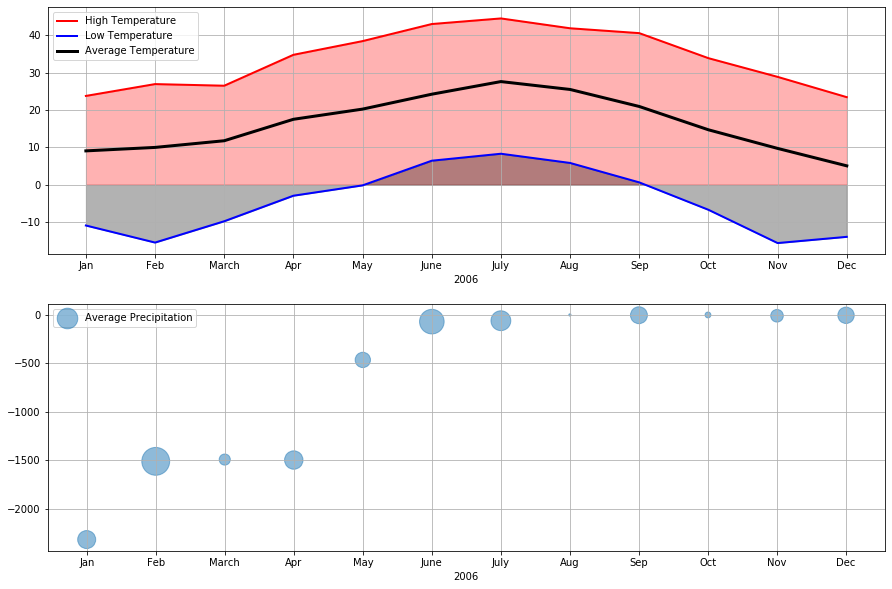

In [503]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

df[0]['mn'] =['Jan','Feb','March','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
ax1.plot(df[0]['mn'],df[0]['highTemp'], label="High Temperature", color='red', linewidth=2,markevery=150)
ax1.plot(df[0]['mn'],df[0]['lowTemp'], label="Low Temperature", color='blue', linewidth=2,markevery=150)
ax1.plot(df[0]['mn'],df[0]['avgTemp'], label="Average Temperature", color='black', linewidth=3,markevery=150)
ax1.fill_between(df[0]['mn'],df[0]['highTemp'], color='red',alpha = 0.3)
ax1.fill_between(df[0]['mn'],df[0]['lowTemp'], color='black',alpha = 0.3)
ax1.legend(loc="upper left")
ax1.set_xlabel(2006)
ax1.grid()

colors = np.random.rand(12)
area = (30 * np.random.rand(50))**2  # 0 to 15 point radii
months = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
ax2.scatter(df[0]['mn'], df[0]['avgPrecipitation'],label = 'Average Precipitation',s = area,cmap = 'cool', alpha = 0.5)
ax2.legend(loc="upper left")
ax2.set_xlabel(2006)
ax2.grid()

plt.savefig('question6_graph1.png')

AttributeError: 'list' object has no attribute 'plot'

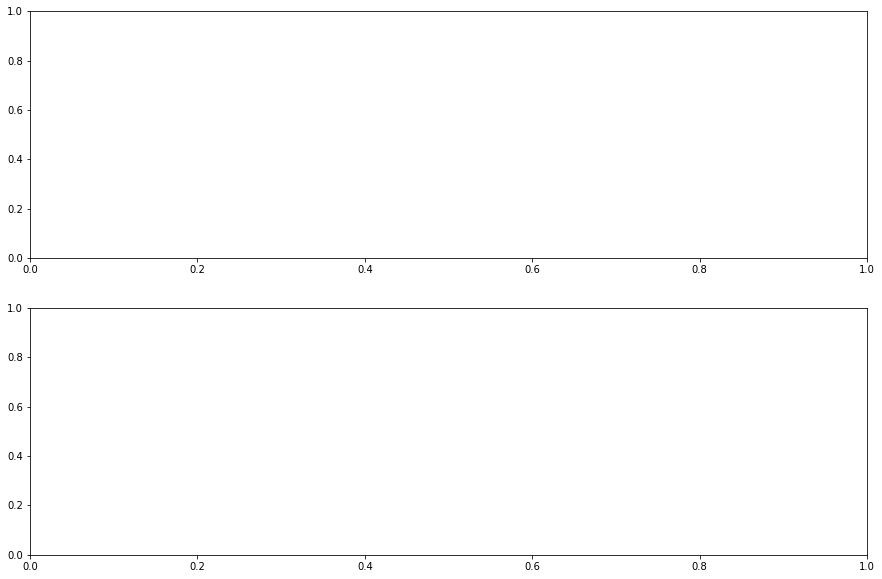

In [508]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

df[0]['mn'] =['Jan','Feb','March','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
marker_style = dict(markersize=10, fillstyle='none')
ax1 = df.plot(figsize=(20,10),x = df[0]['mn'],y = df[0]['highTemp'] ,grid = True,linewidth = 4)
#ax1.plot(df[0]['mn'],df[0]['highTemp'], label="High Temperature", color='red', linewidth=2,markevery=150, **marker_style)
#ax1.plot(df[0]['mn'],df[0]['lowTemp'], label="Low Temperature", color='blue', linewidth=2,markevery=150, **marker_style)
#ax1.plot(df[0]['mn'],df[0]['avgTemp'], '--s', label="Average Temperature", color='black', linewidth=3,markevery=150, **marker_style)
ax1.fill_between(df[0]['mn'],df[0]['highTemp'], color='red',alpha = 0.3)
ax1.fill_between(df[0]['mn'],df[0]['lowTemp'], color='black',alpha = 0.3)
ax1.legend(loc="upper left")
ax1.set_xlabel(2006)
ax1.grid()

colors = np.random.rand(12)
area = (30 * np.random.rand(50))**2  # 0 to 15 point radii
months = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
ax2.scatter(df[0]['mn'], df[0]['avgPrecipitation'],label = 'Average Precipitation',s = area,cmap = 'cool', alpha = 0.5)
ax2.legend(loc="upper left")
ax2.set_xlabel(2006)
ax2.grid()

plt.savefig('question6_graph2.png')